<a href="https://colab.research.google.com/github/pachterlab/BP_2022/blob/main/ultima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import anndata

def nd(arr):
    return np.asarray(arr).reshape(-1)


def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, "k-", alpha=0.75, zorder=0)
    ax.set_aspect("equal")
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax


import warnings

warnings.filterwarnings("ignore")


import matplotlib

fsize = 15
matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["font.size"] = fsize
%config InlineBackend.figure_format = 'retina'

## Paper data

In [ ]:
il_paper = anndata.read_h5ad("BP_2022/reference/paper_data/illumina/adata.h5ad")
ul_paper = anndata.read_h5ad("BP_2022/reference/paper_data/ultima/adata.h5ad")

common = np.intersect1d(il_paper.obs.index.values, ul_paper.obs.index.values)
il_paper = il_paper[common].copy()
ul_paper = ul_paper[common].copy()

In [ ]:
maxdiff_ix_paper = pd.Series(il_paper.X.sum(0).A.ravel() - ul_paper.X.sum(0).A.ravel()).nlargest(10)
maxdiff_ix_paper

33655    454045.0
33654    375962.0
13434    225441.0
10736    157128.0
26699    137255.0
27344    129586.0
33658    128799.0
30905    125356.0
11106    123661.0
32042    123059.0
dtype: float32

In [ ]:
genes = [il_paper.var.index.values[i] for i in maxdiff_ix_paper.index.values]
genes

['MT-CO2',
 'MT-CO1',
 'TMSB4X',
 'RPS18',
 'RPL13',
 'RPL23A',
 'MT-CO3',
 'RPL18A',
 'EEF1A1',
 'RPL28']

In [ ]:
np.where(np.array(genes) == "TMSB4X")

(array([2]),)

In [ ]:
tmsb4x_ix_paper = maxdiff_ix_paper.index.values[np.where(np.array(genes) == "TMSB4X")[0][0]]
tmsb4x_ix_paper

13434

In [ ]:
print("illumina: ", il_paper.X.sum(0).A.ravel()[tmsb4x_ix_paper])
print("ultima: ", ul_paper.X.sum(0).A.ravel()[tmsb4x_ix_paper])
print("Illumina - Ultima: ", il_paper.X.sum(0).A.ravel()[tmsb4x_ix_paper] - ul_paper.X.sum(0).A.ravel()[tmsb4x_ix_paper])
print("Illumina/Ultima: ", il_paper.X.sum(0).A.ravel()[tmsb4x_ix_paper]/ul_paper.X.sum(0).A.ravel()[tmsb4x_ix_paper])

illumina:  299011.0
ultima:  73570.0
Illumina - Ultima:  225441.0
Illumina/Ultima:  4.0643063


In [ ]:
np.log(4.0643063)

1.4022430765305616

# No trim differential

In [ ]:
il_no_trim = anndata.read_h5ad("BP_2022/data/illumina/min31_max55/transcriptome/kb/counts_unfiltered/adata.h5ad")
ul_no_trim = anndata.read_h5ad("BP_2022/data/ultima/min0_max0/transcriptome/kb/counts_unfiltered/adata.h5ad")

common = np.intersect1d(il_no_trim.obs.index.values, ul_no_trim.obs.index.values)

il_no_trim = il_no_trim[common].copy()
ul_no_trim = ul_no_trim[common].copy()

maxdiff_ix_no_trim = pd.Series(il_no_trim.X.sum(0).A.ravel() - ul_no_trim.X.sum(0).A.ravel()).nlargest(10)
print(maxdiff_ix_no_trim)

genes = [il_no_trim.var.index.values[i] for i in maxdiff_ix_no_trim.index.values]
genes

24705    145547.0
35       128483.0
60532    102758.0
57520     87878.0
26904     86002.0
39        80301.0
60542     75189.0
51137     62775.0
6871      61100.0
56621     55061.0
dtype: float32


['ENSG00000205542.11',
 'ENSG00000237973.1',
 'ENSG00000198888.2',
 'ENSG00000108107.14',
 'ENSG00000147403.16',
 'ENSG00000248527.1',
 'ENSG00000198804.2',
 'ENSG00000262902.1',
 'ENSG00000034510.6',
 'ENSG00000105372.8']

In [ ]:
# TMSB4X : ENSG00000205542

# Perturb seq

In [1]:
il_cell_line = anndata.read_h5ad("BP_2022/reference/paper_data/cell_line/illumina/adata.h5ad")
ul_cell_line = anndata.read_h5ad("BP_2022/reference/paper_data/cell_line/ultima/adata.h5ad")

common = np.intersect1d(il_cell_line.obs.index.values, ul_cell_line.obs.index.values)

il_cell_line = il_cell_line[common].copy()
ul_cell_line = ul_cell_line[common].copy()

In [ ]:
maxdiff_ix_cell_line = pd.Series(
    il_cell_line.X.sum(0).A.ravel() - ul_cell_line.X.sum(0).A.ravel(), 
    index=il_cell_line.var.index.values).nlargest(107)
#print(maxdiff_ix_cell_line)

In [ ]:
"ENSG00000205542" in maxdiff_ix_cell_line

True

In [ ]:
mask = il_cell_line.var.index.values == "ENSG00000205542"
print("Fold Change (il/ul): ", il_cell_line.X.sum(0).A.ravel()[mask] /  ul_cell_line.X.sum(0).A.ravel()[mask])
print("Il: ", il_cell_line.X.sum(0).A.ravel()[mask])
print("Ul: " ,ul_cell_line.X.sum(0).A.ravel()[mask])

In [ ]:
print("il total counts: ", il_cell_line.X.sum(0).A.ravel()[mask]/il_cell_line.X.sum())
print("ul total counts: ", ul_cell_line.X.sum(0).A.ravel()[mask]/ul_cell_line.X.sum())

il total counts:  [0.00100127]
ul total counts:  [0.00025859]


In [ ]:
0.00100127/0.00025859

3.8720368150353845

In [ ]:
print("il total counts: ", il_cell_line.X.sum())
print("ul total counts: ", ul_cell_line.X.sum())

In [ ]:
185889070.0/65573816.0

2.834806350144393

In [ ]:
maxdiff_ix_cell_line.tail()

ENSG00000144381    173062.0
ENSG00000243678    172336.0
ENSG00000111640    171500.0
ENSG00000122566    169372.0
ENSG00000205542    169168.0
dtype: float32

Fold Change (il/ul):  [10.976293]
Il:  [186125.]
Ul:  [16957.]


In [ ]:
il_cell_line.var.index.values[mask]

array(['ENSG00000205542'], dtype=object)

In [ ]:
(ul_cell_line.var.index.values != il_cell_line.var.index.values).sum() == 0

True

In [ ]:
il_cell_line.var.index.values[mask]

array(['ENSG00000205542'], dtype=object)

In [ ]:
maxdiff_ix_cell_line.shape

(107,)

In [ ]:
common.shape

(6794880,)

In [ ]:
ENSG00000205542.11

## Reanalysis

In [ ]:
il = anndata.read_h5ad("analysis/ultima/data/illumina/kb/out-transcriptome/counts_unfiltered/adata.h5ad")
ul = anndata.read_h5ad("analysis/ultima/data/ultima/kb/out_trim_55_max-transcriptome/counts_unfiltered/adata.h5ad")

common = np.intersect1d(il.obs.index.values, ul.obs.index.values)

In [ ]:
il = il[common].copy()
ul = ul[common].copy()

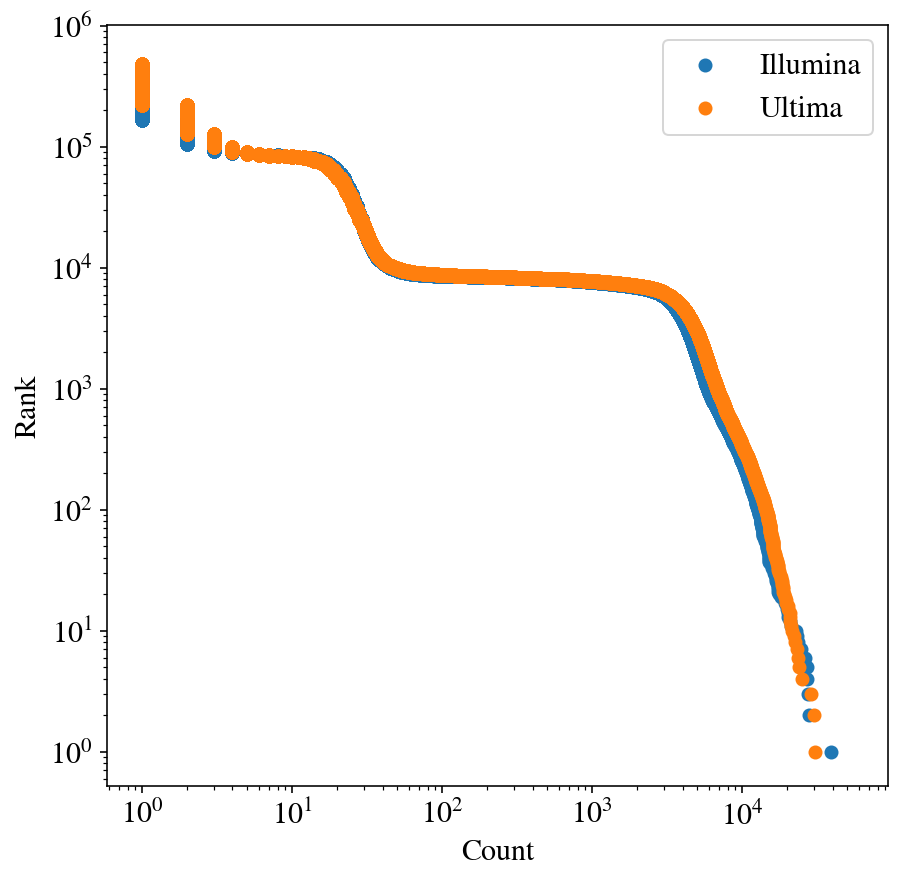

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))

x = np.sort(il.X.sum(1).A.ravel())[::-1]
y = np.arange(x.shape[0])
ax.scatter(x,y, label="Illumina", alpha=1)

x = np.sort(ul.X.sum(1).A.ravel())[::-1]
y = np.arange(x.shape[0])
ax.scatter(x,y, label="Ultima", alpha=1)

ax.set(**{
    "xlabel": "Count",
    "ylabel": "Rank",
    "xscale": "log",
    "yscale": "log"
})
ax.legend()
fig.savefig("kneeplot.png", background="white", dpi=300)
fig.show()

In [ ]:
maxdiff_ix = pd.Series(il.X.sum(0).A.ravel() - ul.X.sum(0).A.ravel()).nlargest(10)
maxdiff_ix

60545    339143.0
24705    147720.0
35       131309.0
28716    107329.0
60532    103905.0
57520     87070.0
60542     86959.0
39        80991.0
51137     61808.0
6871      61161.0
dtype: float32

In [ ]:
amax = maxdiff_ix.index.values[0]

In [ ]:
[il.var.iloc[i]["gene_name"] for i in maxdiff_ix.index.values]

['MT-CO2',
 'TMSB4X',
 'MTCO1P12',
 'RPL30',
 'MT-ND1',
 'RPL28',
 'MT-CO1',
 'MTATP6P1',
 'MTCO1P40',
 'TMSB10']

In [ ]:
[(il.X.sum(0).A.ravel()[i], ul.X.sum(0).A.ravel()[i], il.X.sum(0).A.ravel()[i]- ul.X.sum(0).A.ravel()[i]) for i in maxdiff_ix.index.values]

[(383851.0, 44708.0, 339143.0),
 (301719.0, 153999.0, 147720.0),
 (135777.0, 4468.0, 131309.0),
 (184669.0, 77340.0, 107329.0),
 (109958.0, 6053.0, 103905.0),
 (273186.0, 186116.0, 87070.0),
 (141567.0, 54608.0, 86959.0),
 (84600.0, 3609.0, 80991.0),
 (63908.0, 2100.0, 61808.0),
 (157789.0, 96628.0, 61161.0)]

In [ ]:
tmsb4x_ix = maxdiff_ix.index.values[1]

In [ ]:
print("illumina: ", il.X.sum(0).A.ravel()[tmsb4x_ix])
print("ultima: ", ul.X.sum(0).A.ravel()[tmsb4x_ix])
print("Illumina - Ultima: ", il.X.sum(0).A.ravel()[tmsb4x_ix] - ul.X.sum(0).A.ravel()[tmsb4x_ix])
print("Illumina/Ultima: ", il.X.sum(0).A.ravel()[tmsb4x_ix]/ul.X.sum(0).A.ravel()[tmsb4x_ix])

illumina:  301719.0
ultima:  153999.0
Illumina - Ultima:  147720.0
Illumina/Ultima:  1.959227


In [ ]:
np.log(1.959227)

0.6725500076960192

In [ ]:
pd.Series(il.X.sum(0).A.ravel(), index=il.var.gene_name.values).nlargest(10)

MALAT1     1329580.0
MT-CO3      488481.0
EEF1A1      387417.0
RPL13       385668.0
MT-CO2      383851.0
B2M         368688.0
TPT1        358860.0
MT-RNR2     353707.0
MT-ND4      311681.0
TMSB4X      301719.0
dtype: float32

In [ ]:
il.X.sum(0).A.ravel()[24705]

301719.0

In [ ]:
il.var.iloc[24705]

gene_name    TMSB4X
Name: ENSG00000205542.11, dtype: category
Categories (59412, object): ['5S_rRNA', '5_8S_rRNA', '7SK', 'A1BG', ..., 'ZZEF1', 'hsa-mir-1253', 'hsa-mir-423', 'snoZ196']

## Matrix comparison

In [ ]:
il, il_paper
ul, ul_paper

In [ ]:
il_clean = il[:,il.var.drop_duplicates("gene_name").index]
ul_clean = ul[:,ul.var.drop_duplicates("gene_name").index]

In [ ]:
il_clean.var = il_clean.var.set_index("gene_name")
ul_clean.var = ul_clean.var.set_index("gene_name")

In [ ]:
common_cells = np.intersect1d(il_clean.obs.index.values, il_paper.obs.index.values)
common_genes = np.intersect1d(il_clean.var.index.values, il_paper.var.index.values)
print(common_cells.shape[0], common_genes.shape[0])

il_clean_f = il_clean[common_cells][:,common_genes].copy()
il_paper_f = il_paper[common_cells][:,common_genes].copy()

7825 22255


In [ ]:
common_cells = np.intersect1d(ul_clean.obs.index.values, ul_paper.obs.index.values)
common_genes = np.intersect1d(ul_clean.var.index.values, ul_paper.var.index.values)
print(common_cells.shape[0], common_genes.shape[0])

ul_clean_f = ul_clean[common_cells][:,common_genes].copy()
ul_paper_f = ul_paper[common_cells][:,common_genes].copy()

7825 22255


In [ ]:
from sklearn.linear_model import LinearRegression

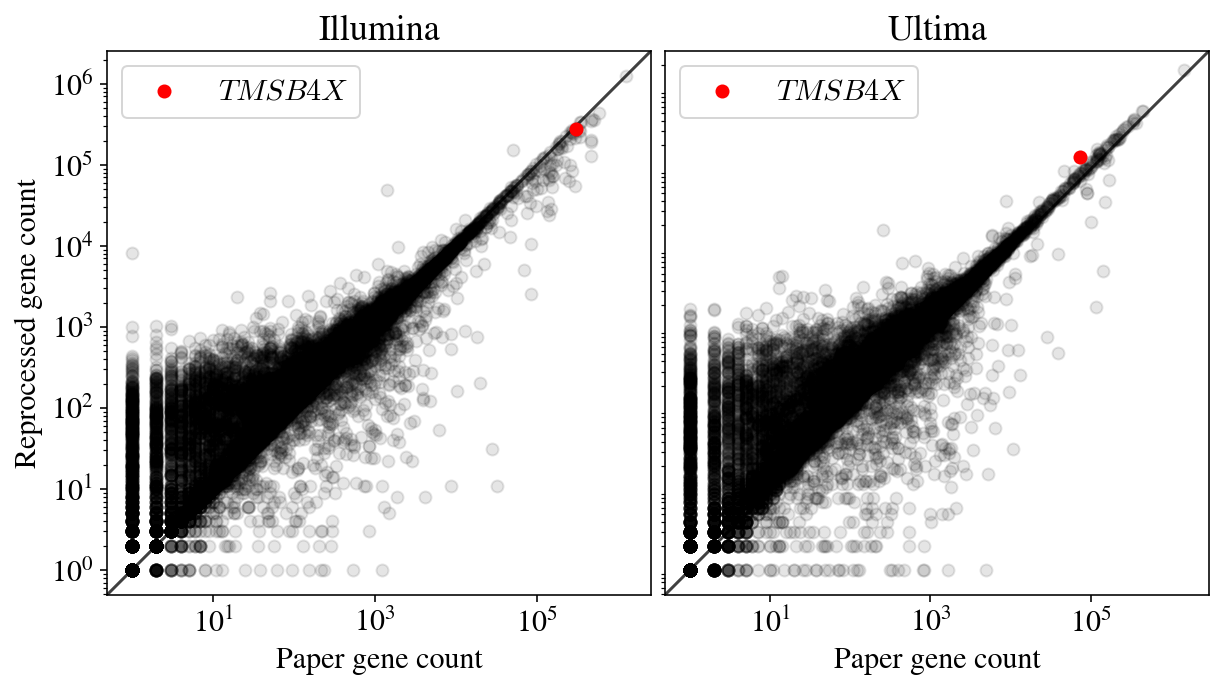

In [ ]:
fig, axs = plt.subplots(figsize=(10,5), ncols=2)
fig.subplots_adjust(wspace=0)
ax = axs[0]
x = il_paper_f.X.sum(0).A.ravel()
y = il_clean_f.X.sum(0).A.ravel()
ax.scatter(x,y, alpha=0.1, color="k")
reg = LinearRegression().fit(x.reshape(-1,1), y)
r2_il = reg.score(x.reshape(-1,1), y)

ix = np.where(il_paper_f.var.index.values == "TMSB4X")[0][0]
xx = x[ix]
yy = y[ix]
ax.scatter(xx,yy, color="r", label="$TMSB4X$")

ax.set(**{
    "xscale": "log",
    "yscale": "log",
    "xlabel": "Paper gene count",
    "ylabel": "Reprocessed gene count",
    "title": "Illumina"
})
yex(ax)
ylim = ax.get_ylim()
ax.legend()

ax = axs[1]
x = ul_paper_f.X.sum(0).A.ravel()
y = ul_clean_f.X.sum(0).A.ravel()
ax.scatter(x,y, alpha=0.1, color="k")
reg = LinearRegression().fit(x.reshape(-1,1), y)
r2_ul = reg.score(x.reshape(-1,1), y)

ix = np.where(ul_paper_f.var.index.values == "TMSB4X")[0][0]
xx = x[ix]
yy = y[ix]
ax.scatter(xx,yy, color="r", label="$TMSB4X$")

ax.set(**{
    "xscale": "log",
    "yscale": "log",
    "xlabel": "Paper gene count",
    "ylabel": "",
    "title": "Ultima",
    "yticks": [],
    "yticklabels": [],
    "ylim": ylim
})
yex(ax)
ax.legend()

fig.show()

In [ ]:
print("Illumina $r^2$: ", r2_il)
print("Ultima $r^2$: ", r2_ul)

Illumina $r^2$:  0.8997351336480678
Ultima $r^2$:  0.9798936044220788


## Read analysis

In [ ]:
rlens = pd.read_csv("analysis/ultima/data/ultima/hisat2/trim_31_min/rlens-31_min-tmsb4x-bam.txt", header=None, names=["length"])

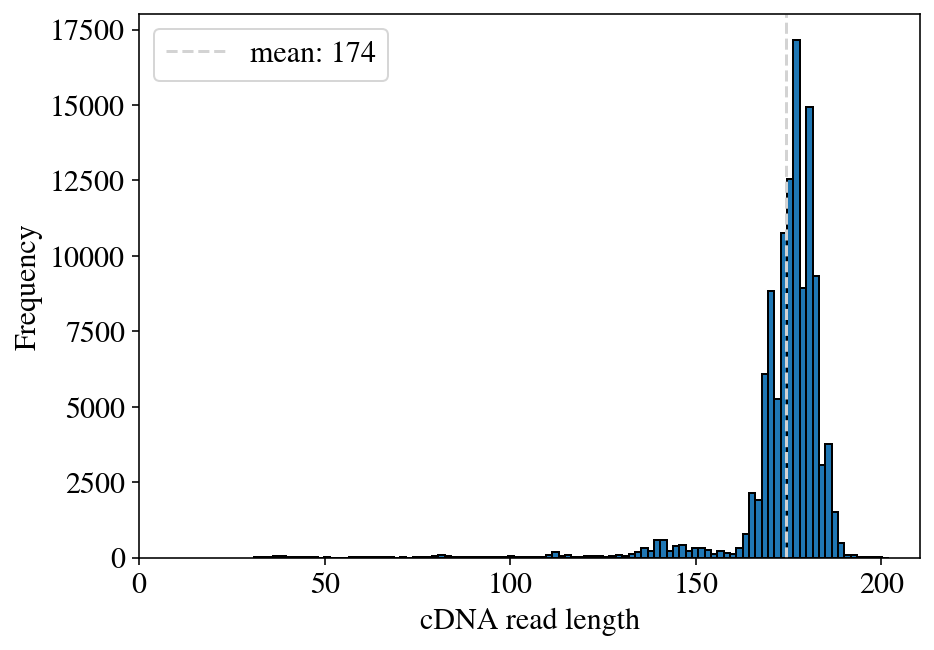

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

x = rlens.query('length > 0').values.ravel()
ax.hist(x, bins=100, edgecolor="k")
ax.axvline(x.mean(), color="lightgray", label=f"mean: {x.mean():,.0f}", linestyle="--")
ax.set(**{
    "xlim": (0),
    "xlabel": "cDNA read length",
    "ylabel": "Frequency",
})
ax.legend()
fig.savefig("rlens.png", background="white", dpi=300)
fig.show()

## Homopolymer analysis

It streams through each line to find homopolymers. Outputs chromosome, start, end, homopolymer base, length of homopolymer.

In [ ]:
!cat reference/test.fasta

>chrom1
AAGTCAAAA
GGGGTTTTCCCC
>chrome2
AGTCCCCCTTTTAAAA
GGGGTTTTCCCC
AAAATTTT


http://protists.ensembl.org/Plasmodium_falciparum/Info/Index
http://ftp.ensemblgenomes.org/pub/protists/release-53/fasta/plasmodium_falciparum/dna/Plasmodium_falciparum.ASM276v2.dna.toplevel.fa.gz

https://uswest.ensembl.org/Homo_sapiens/Info/Index
http://ftp.ensembl.org/pub/release-106/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz

In [ ]:
%%time
l = 1
chrome = base = start = end = -1
with open("analysis/ultima/reference/homo_sapiens-transcriptome.fasta", 'r') as f, open("analysis/ultima/reference/hs_homopolymers-transcriptome.txt", 'w') as w:
  for line in f.readlines():
      if line[0] == '>':
          if end - start > l:
              w.write('\t'.join(map(str,[f"chr{chrome}",start,end,base,end - start])) + '\n')
          chrome = line.strip()[1:].split(' ')[0]
          base = -1
          start = end = 0
      else:
          for b in line.strip():
              if b != base:
                  if end - start > l:
                      w.write('\t'.join(map(str,[f"chr{chrome}",start,end,base,end - start])) +'\n')
                  start = end
                  base = b
              end += 1

  if end - start > l:
      w.write('\t'.join(map(str,[f"chr{chrome}",start,end,base,end - start])) +'\n')

CPU times: user 4min, sys: 7.08 s, total: 4min 7s
Wall time: 4min 7s


In [ ]:
pf = pd.read_csv("analysis/ultima/reference/pf_homopolymers-genome.txt", sep="\t", header=None, names=["chrom", "start", "end", "base", "length"])
hs = pd.read_csv("analysis/ultima/reference/hs_homopolymers-genome.txt", sep="\t", header=None, names=["chrom", "start", "end", "base", "length"])
hst = pd.read_csv("analysis/ultima/reference/hs_homopolymers-transcriptome.txt", sep="\t", header=None, names=["chrom", "start", "end", "base", "length"])

In [ ]:
pf = pf[pf.eval("base != 'N'")]
hs = hs[hs.eval("base != 'N'")]
hst = hst[hst.eval("base != 'N'")]

In [ ]:
pf_lens = pf.groupby("length").count()["base"]
hs_lens = hs.groupby("length").count()["base"]
hst_lens = hst.groupby("length").count()["base"]

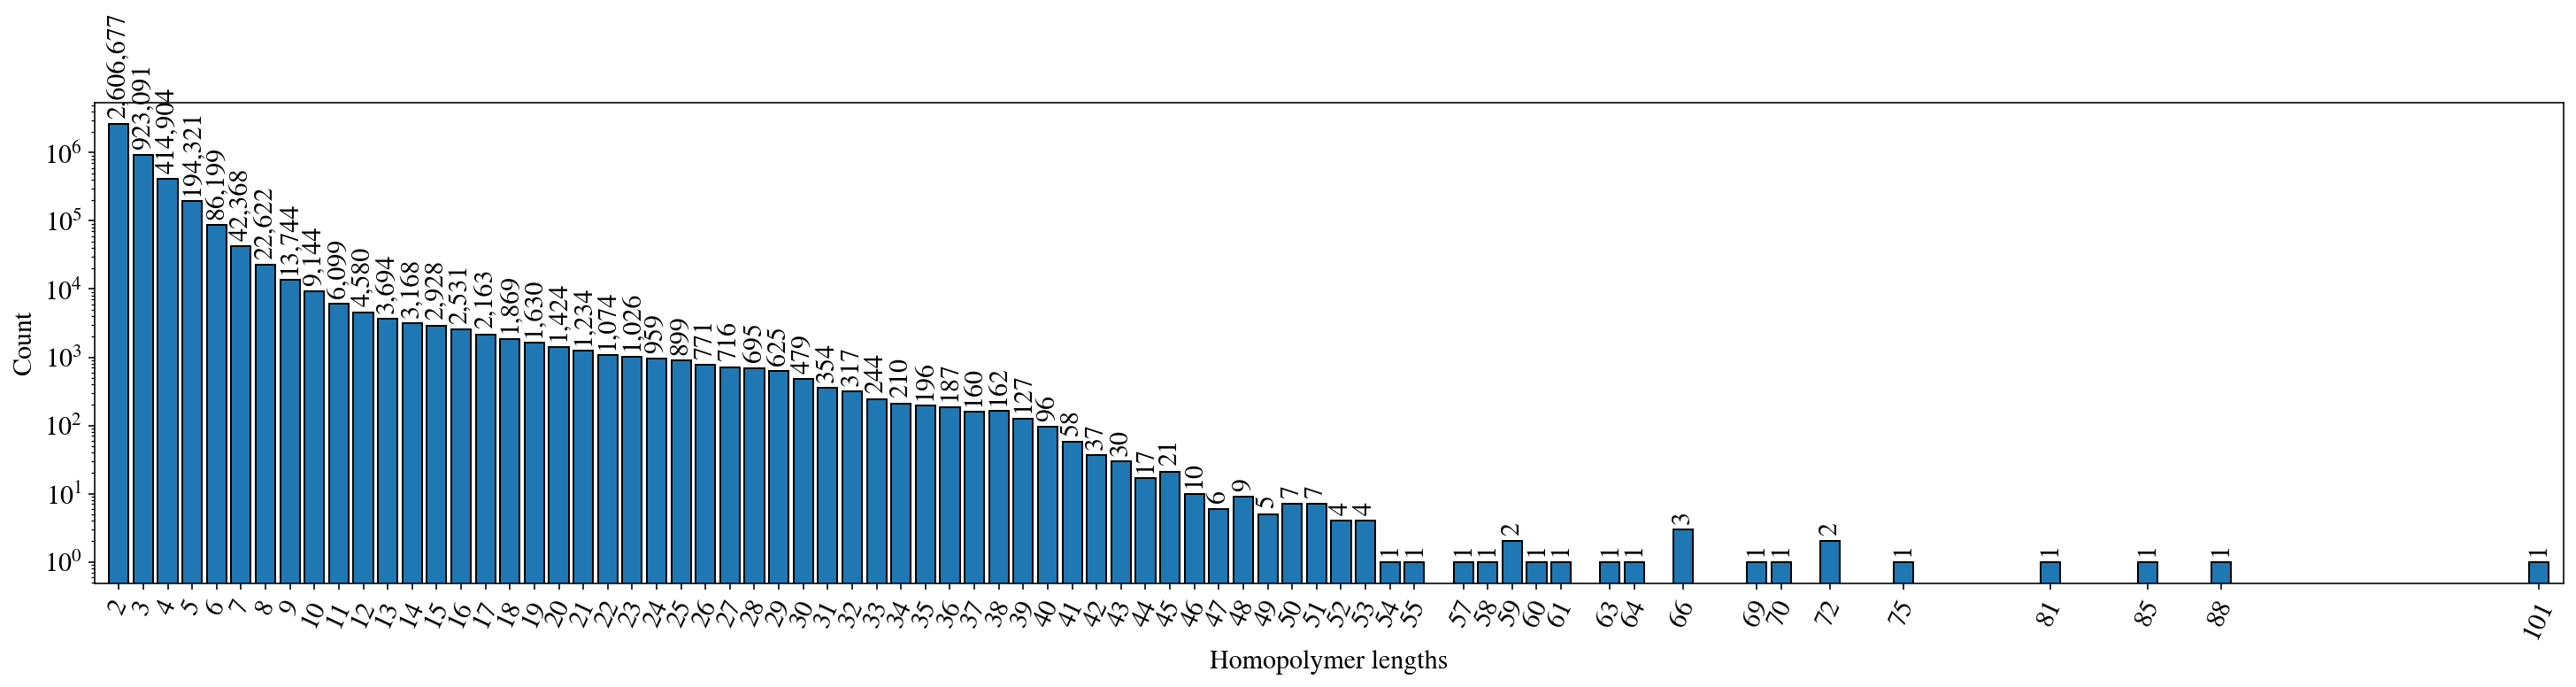

In [ ]:
fig, ax = plt.subplots(figsize=(25,5))

x = pf_lens.index.values
y = pf_lens.values
ax.bar(x,y, edgecolor="k")
for xx,yy in zip(x,y):
  ax.text(xx,yy*1.5, f"{yy:,.0f}", ha="center", rotation="90")

ax.set(**{
    "xlabel": "Homopolymer lengths",
    "ylabel": "Counts",
    "xticks": x,
    "yscale": "log",
    "xlim": (1, 102)
})
ax.set_xticklabels(x, rotation=65)
fig.show()

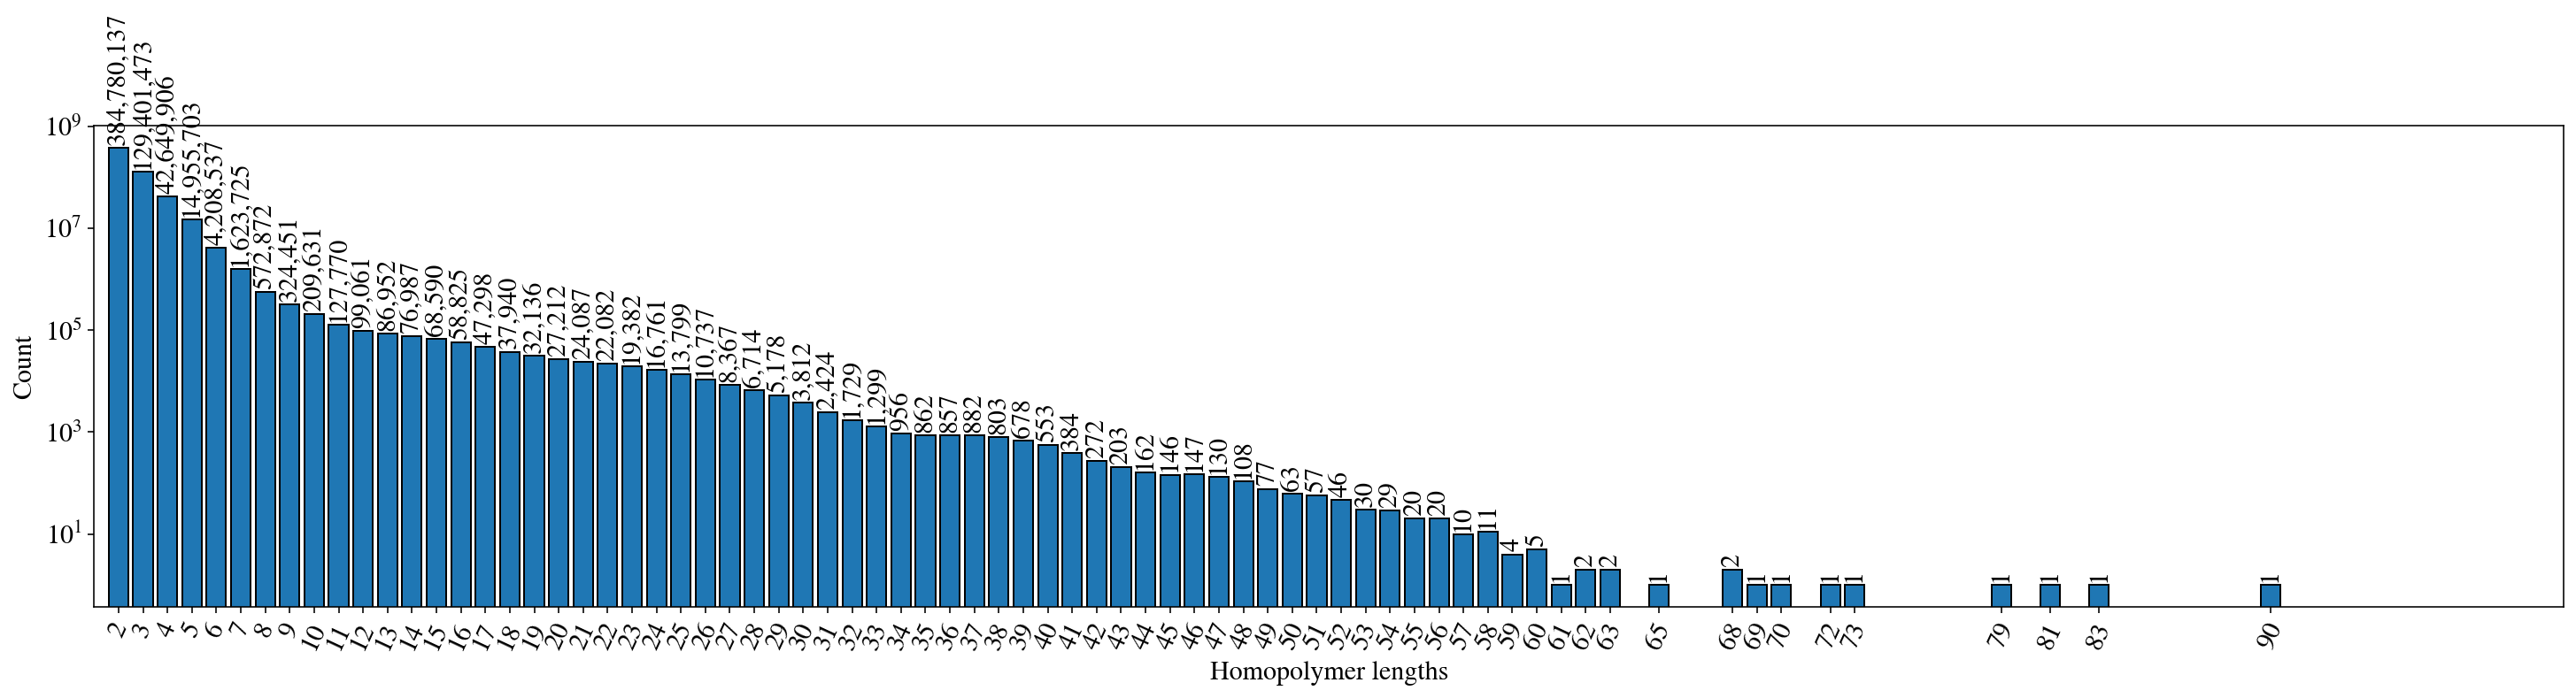

In [ ]:
fig, ax = plt.subplots(figsize=(25,5))

x = hs_lens.index.values
y = hs_lens.values
ax.bar(x,y, edgecolor="k")
for xx,yy in zip(x,y):
  ax.text(xx,yy*1.5, f"{yy:,.0f}", ha="center", rotation="90")

ax.set(**{
    "xlabel": "Homopolymer lengths",
    "ylabel": "Counts",
    "xticks": x,
    "yscale": "log",
    "xlim": (1, 102)
})
ax.set_xticklabels(x, rotation=65)
fig.show()

In [ ]:
hs_size = 3099750718
hst_size = 373968285
pf_size = 23292622

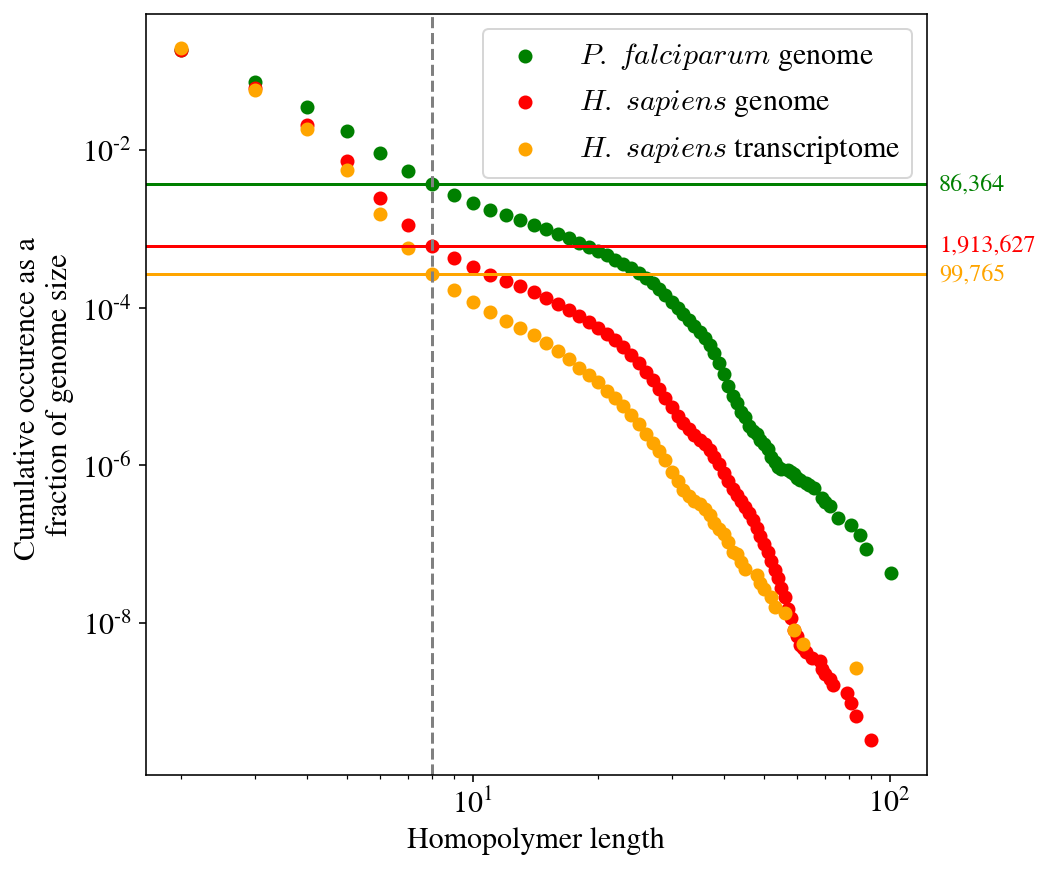

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))


vals = pf_lens[::-1].cumsum()[::-1]
frac = vals/pf_size
color = "green"

x = vals.index.values
y = frac
ax.scatter(x,y, label="$P.$ $falciparum$ genome", color=color)
ax.axhline(y=frac[8], color=color)
ax.annotate(f"{vals[8]:,.0f}", xy=(1,frac[8]), xytext=(6,0),
            xycoords = ax.get_yaxis_transform(), textcoords="offset points",
            size=12, va="center", color=color)

## 
vals = hs_lens[::-1].cumsum()[::-1]
frac = vals/hs_size
color="red"

x = vals.index.values
y = frac
ax.scatter(x,y, label = "$H.$ $sapiens$ genome", color=color)
ax.axhline(y=frac[8], color=color)
ax.annotate(f"{vals[8]:,.0f}", xy=(1,frac[8]), xytext=(6,0),
            xycoords = ax.get_yaxis_transform(), textcoords="offset points",
            size=12, va="center", color=color)

## 
vals = hst_lens[::-1].cumsum()[::-1]
frac = vals/hst_size
color="orange"

x = vals.index.values
y = frac
ax.scatter(x,y, label = "$H.$ $sapiens$ transcriptome", color=color)
ax.axhline(y=frac[8], color=color)
ax.annotate(f"{vals[8]:,.0f}", xy=(1,frac[8]), xytext=(6,0),
            xycoords = ax.get_yaxis_transform(), textcoords="offset points",
            size=12, va="center", color=color)

ax.axvline(x=8, color="grey", linestyle="--")

ax.set(**{
    "xscale": "log",
    "yscale": "log",
    # "ylim": (0.5),
    # "xlim": (0.5),
    "xlabel": "Homopolymer length",
    "ylabel": "Cumulative occurence as a \nfraction of genome size"
})

ax.legend()
fig.savefig("homopolymer.png", background="white", dpi=300, bbox_inches="tight")
fig.show()

## Indel analysis

In [ ]:
il_indels = pd.read_csv("analysis/ultima/data/illumina/hisat2/indels.txt", header=None, sep="\t", names=["length", "insert", "delete"], index_col=0)
ul_indels = pd.read_csv("analysis/ultima/data/ultima/hisat2/trim_31_min/indels.txt", header=None, sep="\t", names=["length", "insert", "delete"], index_col=0)

In [ ]:
il_indels = il_indels.reindex(ul_indels.index, fill_value=0)

In [ ]:
ul_mapped_len = 19921290
il_mapped_len = 35405700

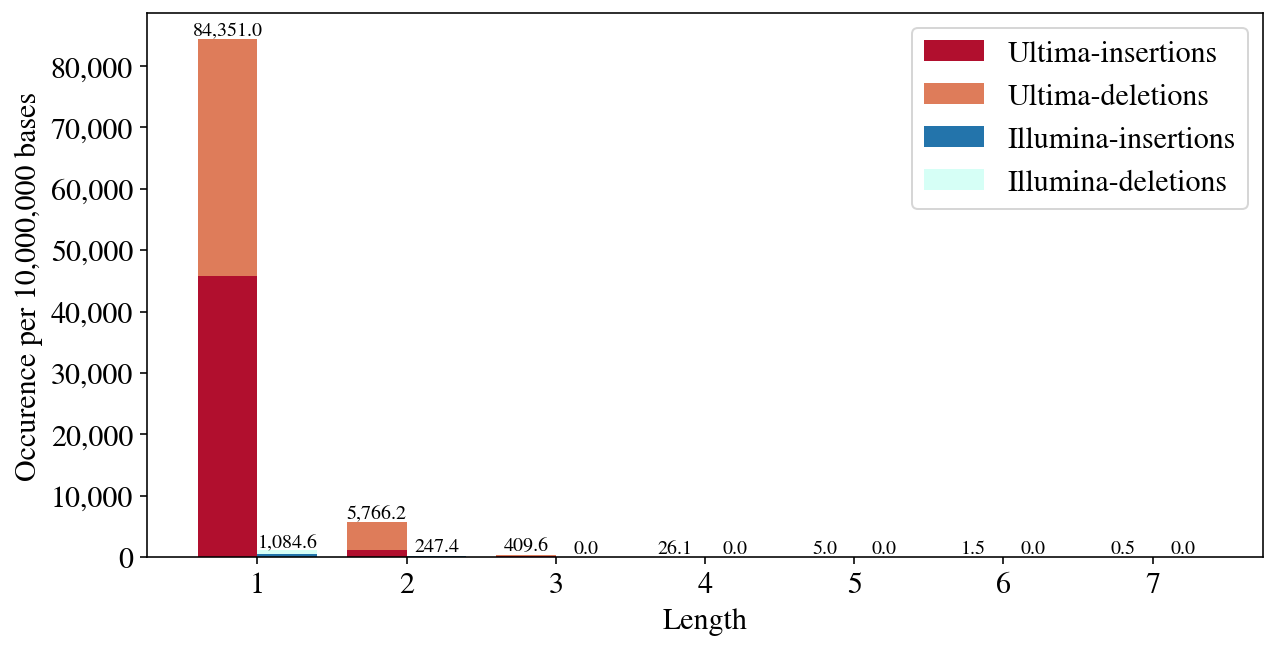

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
w=0.4

x = ul_indels.index.values - w/2
y = ul_indels["insert"]/ul_mapped_len*10_000_000
ax.bar(x, y, label="Ultima-insertions", width=w, align="center", color="#B10F2E")

yy = ul_indels["delete"]/ul_mapped_len*10_000_000
ax.bar(x, yy, label="Ultima-deletions", width=w, align="center", bottom=y, color="#DE7C5A")

for xt,yt in zip(x,yy+y):
  ax.text(xt,yt, f"{yt:,.1f}", ha="center", va="bottom", fontsize=10)


x = il_indels.index.values + w/2
y = il_indels["insert"]/il_mapped_len*10_000_000
ax.bar(x, y, label="Illumina-insertions", width=w, align="center", color="#2374AB")

yy = il_indels["insert"]/il_mapped_len*10_000_000
ax.bar(x, yy, label="Illumina-deletions", width=w, align="center", bottom=y, color="#D6FFF6")
for xt,yt in zip(x,yy+y):
  ax.text(xt,yt, f"{yt:,.1f}", ha="center", va="bottom", fontsize=10)


ax.set(**{
    "xlabel": "Length",
    "ylabel": "Occurence per 10,000,000 bases",
    "ylim": 0
})
ax.legend()
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

fig.savefig("indels.png", background="white", dpi=300)
fig.show()

## Alignment stats

In [ ]:
{
  "Illumina": {
      "nreads_raw": 156100101,
      "nreads_hisat2_tmsb4x_align": 643344,
      "nreads_hisat2_tmsb4x_align_unique": 642948,
      "nreads_kb_tmsb4x_pseudoalign": 636669,
      "nreads_kb_tmsb4x_pseudoalign_unique": 636669,
      "error_rate": {
          "per_1": 1.340556e-03,
          "per_1000": 1.340556
      },
      "avg_quality": 35.9,
      "unique_alignment_hisat2": {
          "frac": 642948 / 156100101,
          "perc": 0.4118
      },
      "unique_pseudoalignment_kb": {
          "frac": 636669 / 156100101,
          "perc": 0.4078
      }
  },
    "Ultima": {
        "nreads_raw": 127942138,
        "nreads_31_min": 126690427,
        "nreads_31_min_hisat2_tmsb4x_align": 114310,
        "nreads_31_min_hisat2_tmsb4x_align_unique": 114276,
        "nreads_kb_tmsb4x_pseudoalign": 244440,
        "nreads_kb_tmsb4x_pseudoalign_unique": 244440,
        "error_rate": {
            "per_1": 1.342587e-02,
            "per_1000": 13.42587
        },
        "avg_quality": 32.6,
        "unique_alignment_hisat2": {
            "frac": 114276 / 126690427,
            "perc": 0.0902
        },
        "unique_pseudoalignment_kb": {
            "frac": 244440 / 126690427,
            "perc": 0.1929
        }
    }
}